<a href="https://colab.research.google.com/github/shreya139/MiningMavericks/blob/main/202218009_Data_Mining_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Impoting Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_Mining_Datasets/deliveries.csv')

In [ ]:
data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(17380, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17380 entries, 0 to 17379
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17380 non-null  int64  
 1   season                  17380 non-null  object 
 2   start_date              17380 non-null  object 
 3   venue                   17380 non-null  object 
 4   innings                 17380 non-null  int64  
 5   ball                    17380 non-null  float64
 6   batting_team            17380 non-null  object 
 7   bowling_team            17380 non-null  object 
 8   striker                 17380 non-null  object 
 9   non_striker             17380 non-null  object 
 10  bowler                  17380 non-null  object 
 11  runs_off_bat            17380 non-null  int64  
 12  extras                  17380 non-null  int64  
 13  wides                   431 non-null    float64
 14  noballs                 42 non-null   

In [ ]:
data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [ ]:
data.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     16949
noballs                   17338
byes                      17354
legbyes                   17263
penalty                   17379
wicket_type               16889
player_dismissed          16889
other_wicket_type         17380
other_player_dismissed    17380
dtype: int64

In [ ]:
# calculating the percentage of missig values
missing_percentage = (data.isnull().sum() / len(data)) * 100

In [ ]:
# checking the percentage of null values in all the columns
print(round(missing_percentage, 2))

match_id                    0.00
season                      0.00
start_date                  0.00
venue                       0.00
innings                     0.00
ball                        0.00
batting_team                0.00
bowling_team                0.00
striker                     0.00
non_striker                 0.00
bowler                      0.00
runs_off_bat                0.00
extras                      0.00
wides                      97.52
noballs                    99.76
byes                       99.85
legbyes                    99.33
penalty                    99.99
wicket_type                97.17
player_dismissed           97.17
other_wicket_type         100.00
other_player_dismissed    100.00
dtype: float64


In [ ]:
data = data.drop(columns=['season'])

In [ ]:
data["wicket"] = data["player_dismissed"].apply(lambda x: 1 if isinstance(x, str) else 0)

In [ ]:
data[["wides", "noballs", "byes", "legbyes", "penalty"]] = data[["wides", "noballs", "byes", "legbyes", "penalty"]].fillna(0)

In [ ]:
data.wicket_type.fillna("no wicket", inplace=True)

In [ ]:
data.player_dismissed.fillna("no wicket", inplace=True)

In [ ]:
data = data.drop(columns=['other_wicket_type','other_player_dismissed'])

In [ ]:
data.isnull().sum()

match_id            0
start_date          0
venue               0
innings             0
ball                0
batting_team        0
bowling_team        0
striker             0
non_striker         0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
byes                0
legbyes             0
penalty             0
wicket_type         0
player_dismissed    0
wicket              0
dtype: int64

In [ ]:
# checking if there are any duplicate records in the dataset
data.duplicated().sum()

1

In [ ]:
# summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,17380.0,16.418815,9.196759,1.0,8.0,17.0,24.0,32.0
innings,17380.0,1.453797,0.497875,1.0,1.0,1.0,2.0,2.0
ball,17380.0,22.544108,13.638454,0.1,10.6,22.1,33.5,49.7
runs_off_bat,17380.0,0.895224,1.392734,0.0,0.0,0.0,1.0,6.0
extras,17380.0,0.044649,0.285378,0.0,0.0,0.0,0.0,5.0
wides,17380.0,0.030380,0.234044,0.0,0.0,0.0,0.0,5.0
noballs,17380.0,0.002417,0.049101,0.0,0.0,0.0,0.0,1.0
byes,17380.0,0.003222,0.099431,0.0,0.0,0.0,0.0,4.0
legbyes,17380.0,0.008343,0.117952,0.0,0.0,0.0,0.0,4.0
penalty,17380.0,0.000288,0.037927,0.0,0.0,0.0,0.0,5.0


In [ ]:
# summary of the dataset including columns of object type
data.describe(include='object').T

,count,unique,top,freq
start_date,17380,28,2023-10-10,1210
venue,17380,10,"MA Chidambaram Stadium, Chepauk, Chennai",2854
batting_team,17380,10,South Africa,2103
bowling_team,17380,10,New Zealand,2010
striker,17380,141,Q de Kock,497
non_striker,17380,140,Q de Kock,502
bowler,17380,92,MJ Santner,411
wicket_type,17380,8,no wicket,16889
player_dismissed,17380,136,no wicket,16889


In [ ]:
# unique team names
unique_batting_teams = data['batting_team'].unique()
print(unique_batting_teams)

['England' 'New Zealand' 'Pakistan' 'Netherlands' 'Afghanistan'
 'Bangladesh' 'South Africa' 'Sri Lanka' 'Australia' 'India']


In [ ]:
data.nunique()

match_id             32
start_date           28
venue                10
innings               2
ball                389
batting_team         10
bowling_team         10
striker             141
non_striker         140
bowler               92
runs_off_bat          7
extras                6
wides                 5
noballs               2
byes                  5
legbyes               4
penalty               2
wicket_type           8
player_dismissed    136
wicket                2
dtype: int64

In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}:\n{unique_values}\n")

Unique values in match_id:
[ 1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 10 23 24
 25 26 27 28 29 30 31 32]

Unique values in start_date:
['2023-10-05' '2023-10-06' '2023-10-07' '2023-10-08' '2023-10-09'
 '2023-10-10' '2023-10-11' '2023-10-13' '2023-10-14' '2023-10-15'
 '2023-10-16' '2023-10-17' '2023-10-18' '2023-10-19' '2023-10-20'
 '2023-10-21' '2023-10-22' '2023-10-23' '2023-10-12' '2023-10-24'
 '2023-10-25' '2023-10-26' '2023-10-27' '2023-10-28' '2023-10-29'
 '2023-10-30' '2023-10-31' '2023-11-01']

Unique values in venue:
['Narendra Modi Stadium, Ahmedabad'
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad'
 'Himachal Pradesh Cricket Association Stadium, Dharamsala'
 'Arun Jaitley Stadium, Delhi' 'MA Chidambaram Stadium, Chepauk, Chennai'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow'
 'Maharashtra Cricket Association Stadium, Pune'
 'M Chinnaswamy Stadium, Bengaluru' 'Wankhede Stadium, Mumbai'
 'Eden Gardens, Kolkata']

Unique val

# **Univariate Analysis and Preprocessing on Deliveries Data**

In [ ]:
def plot_categorical_with_percentage(data, col):
    plt.figure(figsize=(15, 6))

    # Check the number of unique categories in the column
    unique_categories = data[col].nunique()

    if unique_categories > 10:
        # If there are more than 10 categories, select the first 10
        top_categories = data[col].value_counts().index[:8]
        filtered_data = data[data[col].isin(top_categories)]
    else:
        # If there are 8 or fewer categories, use all of them
        filtered_data = data

    ax = sns.barplot(x=filtered_data[col].value_counts().index, y=filtered_data[col].value_counts(normalize=True) * 100, palette='pastel')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.show()


### **Observation on start_date**

In [ ]:
data['start_date'].value_counts()

2023-10-10    1210
2023-10-28    1184
2023-10-21    1064
2023-10-07    1035
2023-10-23     614
2023-10-24     601
2023-10-22     599
2023-10-20     597
2023-10-27     589
2023-10-09     585
2023-10-30     582
2023-10-13     575
2023-10-12     561
2023-10-19     558
2023-10-06     557
2023-10-08     557
2023-10-15     556
2023-10-17     539
2023-10-05     525
2023-10-11     525
2023-11-01     524
2023-10-18     519
2023-10-29     518
2023-10-16     485
2023-10-31     473
2023-10-25     445
2023-10-14     442
2023-10-26     361
Name: start_date, dtype: int64

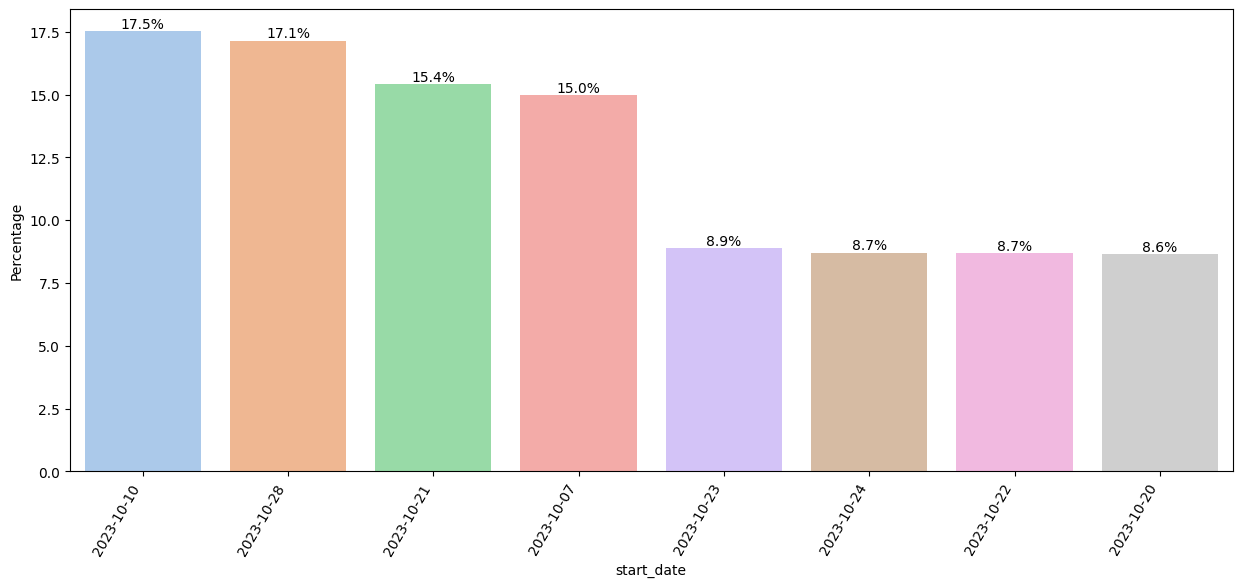

In [ ]:
plot_categorical_with_percentage(data, 'start_date')

In [ ]:
data['start_date'] = pd.to_datetime(data['start_date']).dt.date

### **Observation on venue**

In [ ]:
data['venue'].value_counts()

MA Chidambaram Stadium, Chepauk, Chennai                                 2854
Himachal Pradesh Cricket Association Stadium, Dharamsala                 2794
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow    2180
Arun Jaitley Stadium, Delhi                                              2120
Rajiv Gandhi International Stadium, Uppal, Hyderabad                     1755
Maharashtra Cricket Association Stadium, Pune                            1664
Wankhede Stadium, Mumbai                                                 1049
Eden Gardens, Kolkata                                                    1039
Narendra Modi Stadium, Ahmedabad                                          967
M Chinnaswamy Stadium, Bengaluru                                          958
Name: venue, dtype: int64

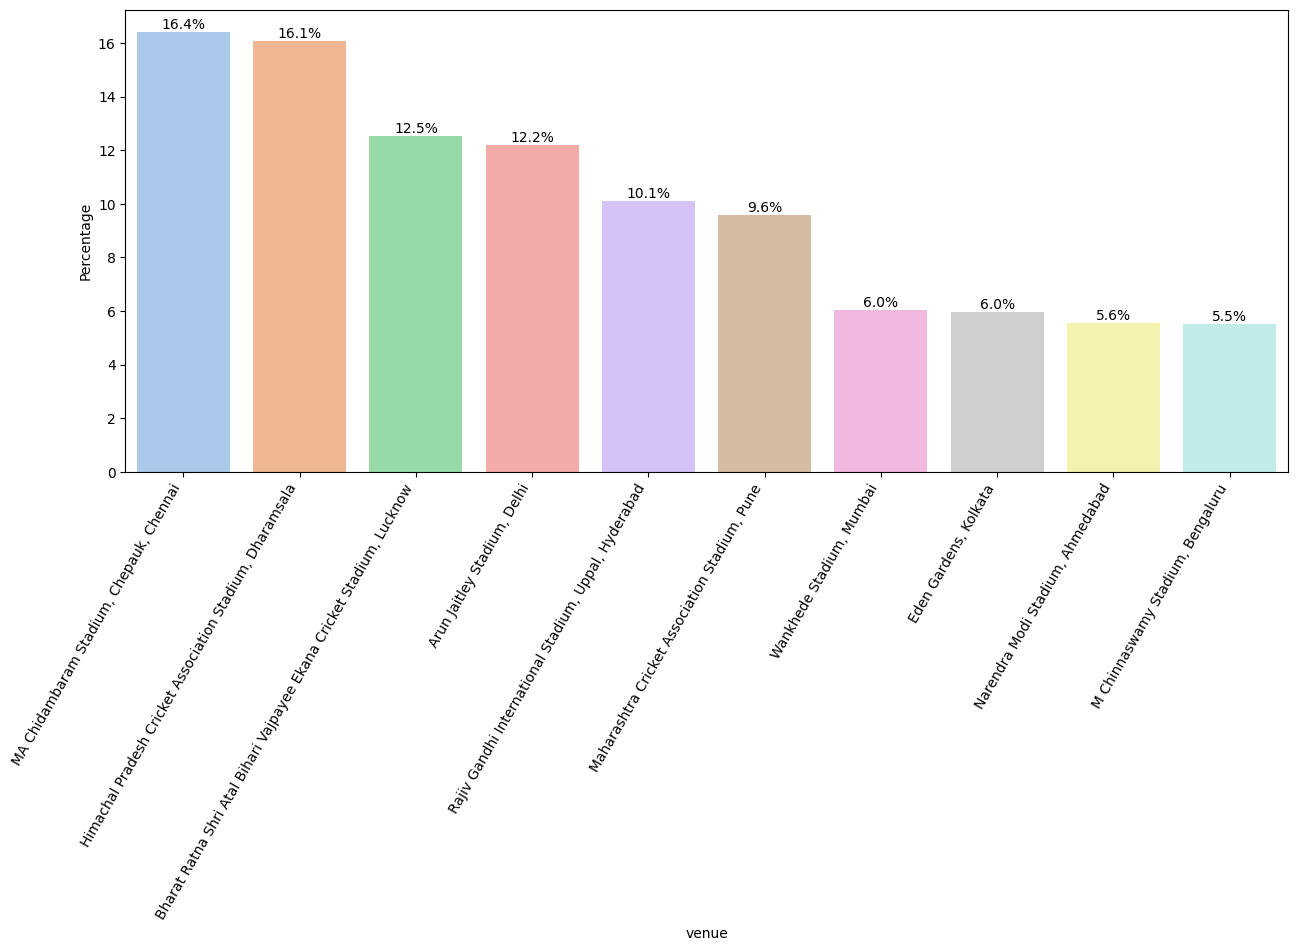

In [ ]:
plot_categorical_with_percentage(data, 'venue')

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data['venue'] = label_encoder.fit_transform(data['venue'])

### **Observation on innings**

In [ ]:
data['innings'].value_counts()

1    9493
2    7887
Name: innings, dtype: int64

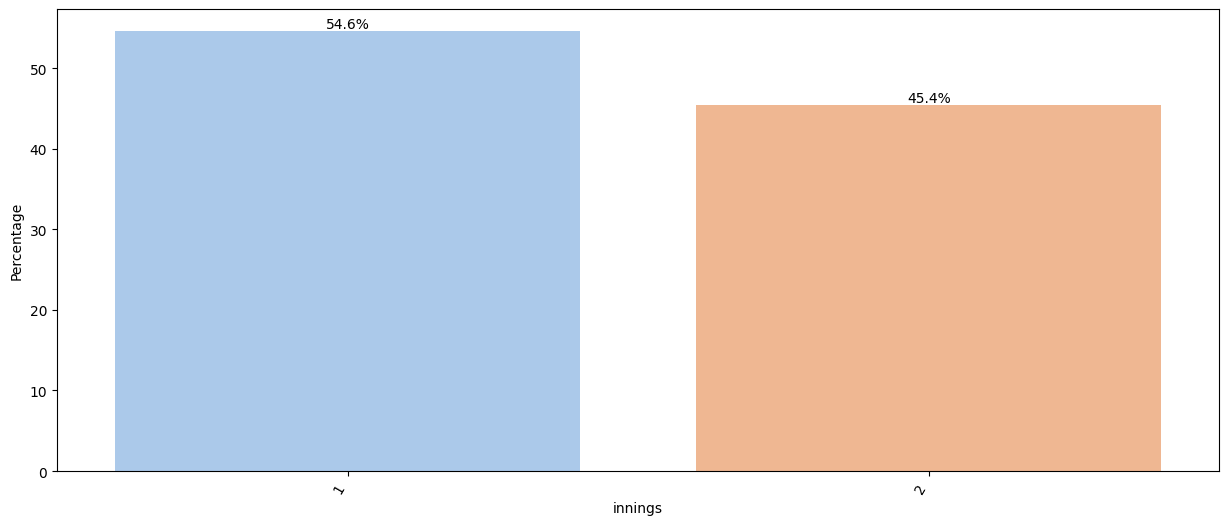

In [ ]:
plot_categorical_with_percentage(data, 'innings')

### **Observation on batting_team**

In [ ]:
data['batting_team'].value_counts()

South Africa    2103
Pakistan        1950
Bangladesh      1949
New Zealand     1935
Australia       1701
Afghanistan     1641
Sri Lanka       1616
Netherlands     1570
India           1502
England         1413
Name: batting_team, dtype: int64

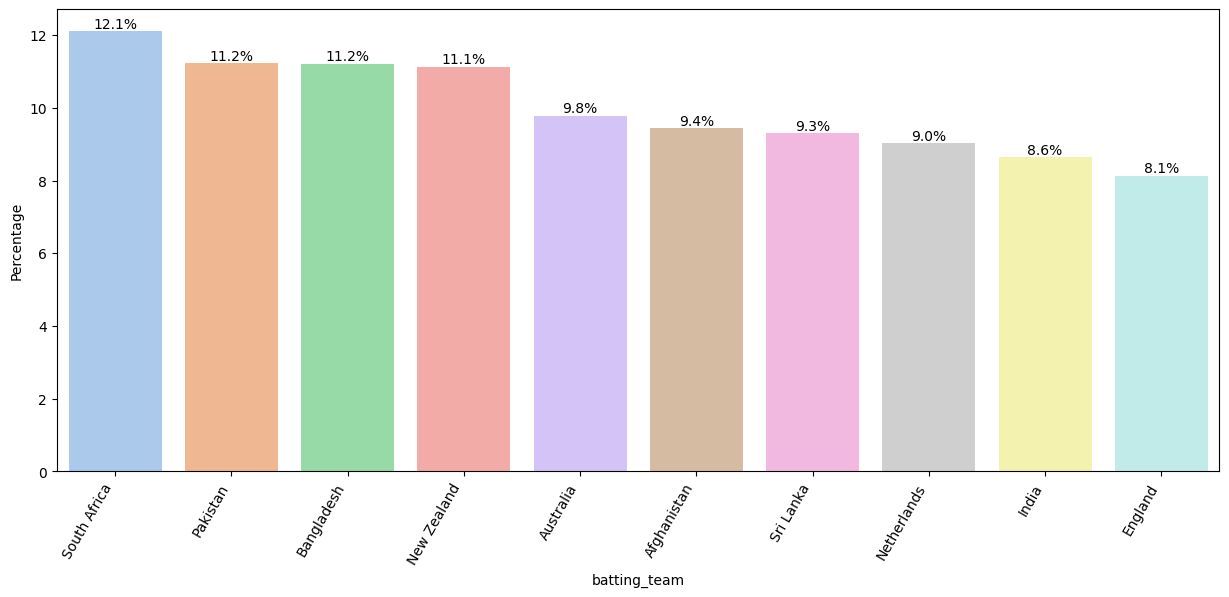

In [ ]:
plot_categorical_with_percentage(data, 'batting_team')

In [ ]:
country_mappings = {
    'South Africa': 1,
    'Pakistan': 2,
    'Bangladesh': 3,
    'New Zealand': 4,
    'Australia': 5,
    'Afghanistan': 6,
    'Sri Lanka': 7,
    'Netherlands': 8,
    'India': 9,
    'England': 10
}

In [ ]:
data['batting_team'] = data['batting_team'].map(country_mappings)

### **Observation on bowling_team**

In [ ]:
data['bowling_team'].value_counts()

New Zealand     2010
Pakistan        1935
Bangladesh      1862
South Africa    1753
Netherlands     1738
India           1697
Sri Lanka       1635
Afghanistan     1596
England         1592
Australia       1562
Name: bowling_team, dtype: int64

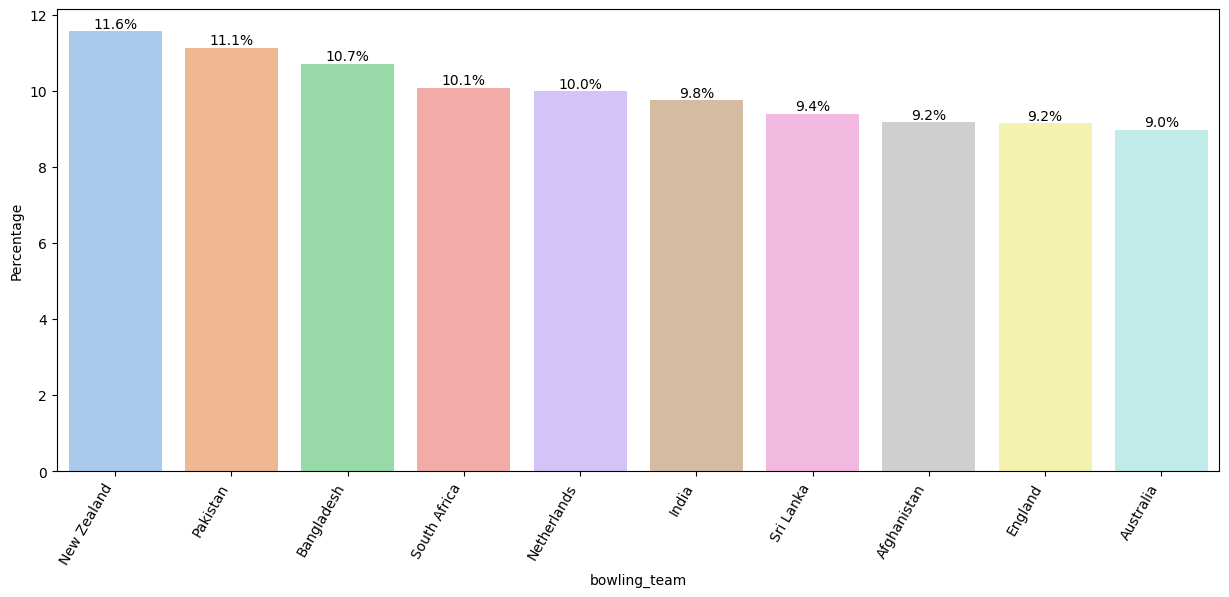

In [ ]:
plot_categorical_with_percentage(data, 'bowling_team')

In [ ]:
data['bowling_team'] = data['bowling_team'].map(country_mappings)

### **Observation on striker**

In [ ]:
data['striker'].value_counts()

Q de Kock            497
V Kohli              409
R Ravindra           401
HE van der Dussen    378
DA Warner            377
                    ... 
JR Hazlewood           4
PVD Chameera           4
Usama Mir              3
MADI Hemantha          3
AT Carey               2
Name: striker, Length: 141, dtype: int64

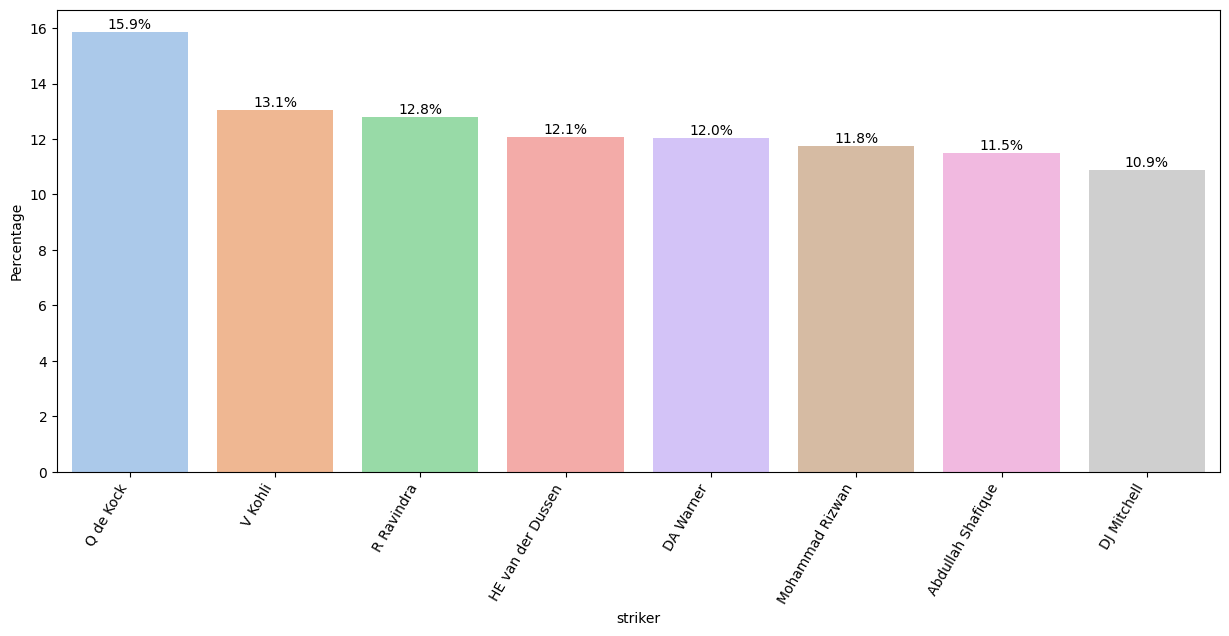

In [ ]:
plot_categorical_with_percentage(data, 'striker')

In [ ]:
data['striker'] = label_encoder.fit_transform(data['striker'])

### **Observation on non_striker**

In [ ]:
data['non_striker'].value_counts()

Q de Kock          502
R Ravindra         466
DA Warner          411
Mohammad Rizwan    379
V Kohli            378
                  ... 
TG Southee           4
Usama Mir            3
PVD Chameera         3
Mohammed Shami       1
CBRLS Kumara         1
Name: non_striker, Length: 140, dtype: int64

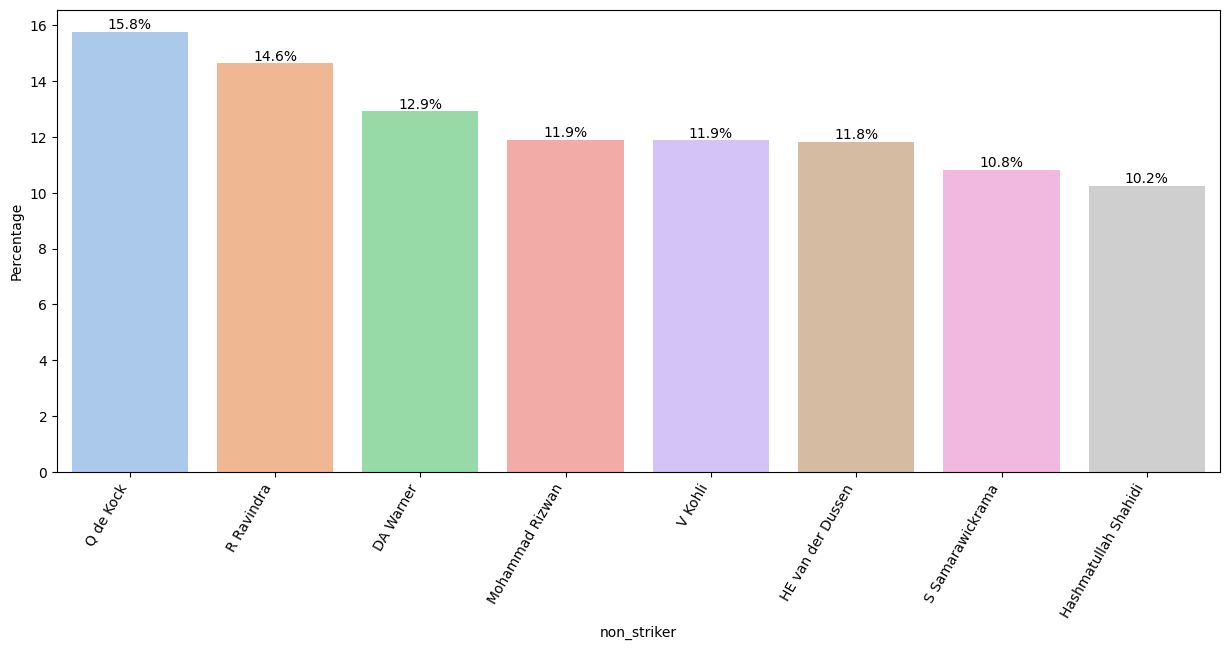

In [ ]:
plot_categorical_with_percentage(data, 'non_striker')

In [ ]:
data['non_striker'] = label_encoder.fit_transform(data['non_striker'])

### **Observation on bowler**

In [ ]:
data['bowler'].value_counts()

MJ Santner               411
TA Boult                 402
Shaheen Shah Afridi      383
Haris Rauf               367
M Jansen                 359
                        ... 
C Green                   12
KIC Asalanka               6
DJ Mitchell                6
Nazmul Hossain Shanto      6
V Kohli                    3
Name: bowler, Length: 92, dtype: int64

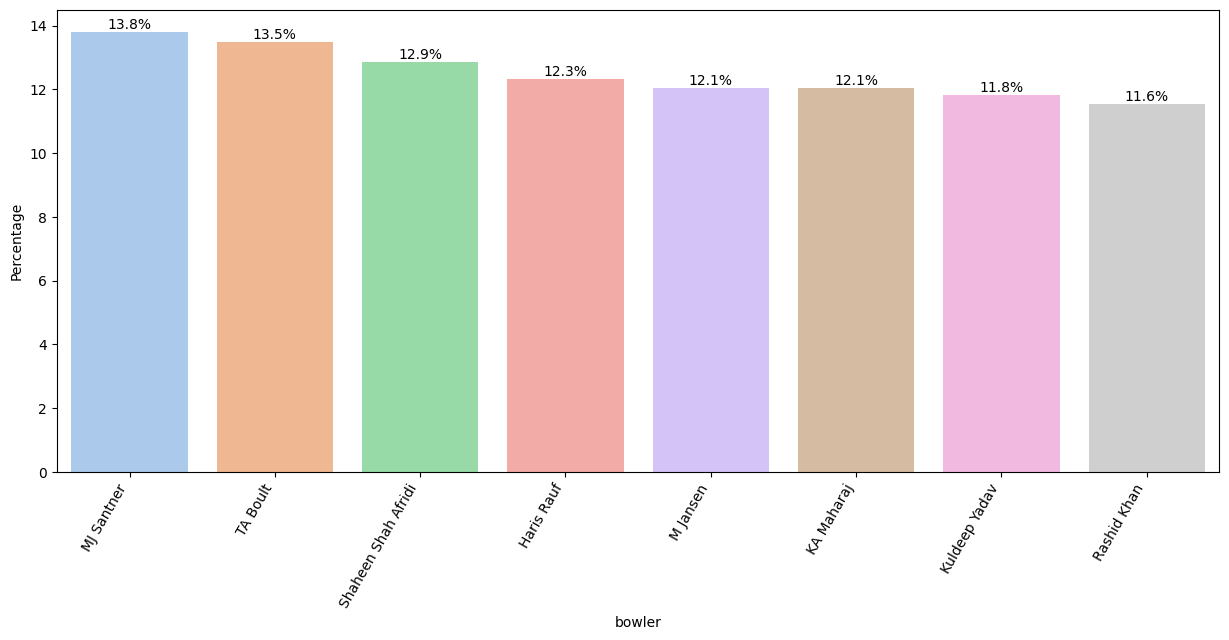

In [ ]:
plot_categorical_with_percentage(data, 'bowler')

In [ ]:
data['bowler'] = label_encoder.fit_transform(data['bowler'])

### **Observation on runs_off_bat**

In [ ]:
data['runs_off_bat'].value_counts()

0    9181
1    5525
4    1480
2     726
6     418
3      48
5       2
Name: runs_off_bat, dtype: int64

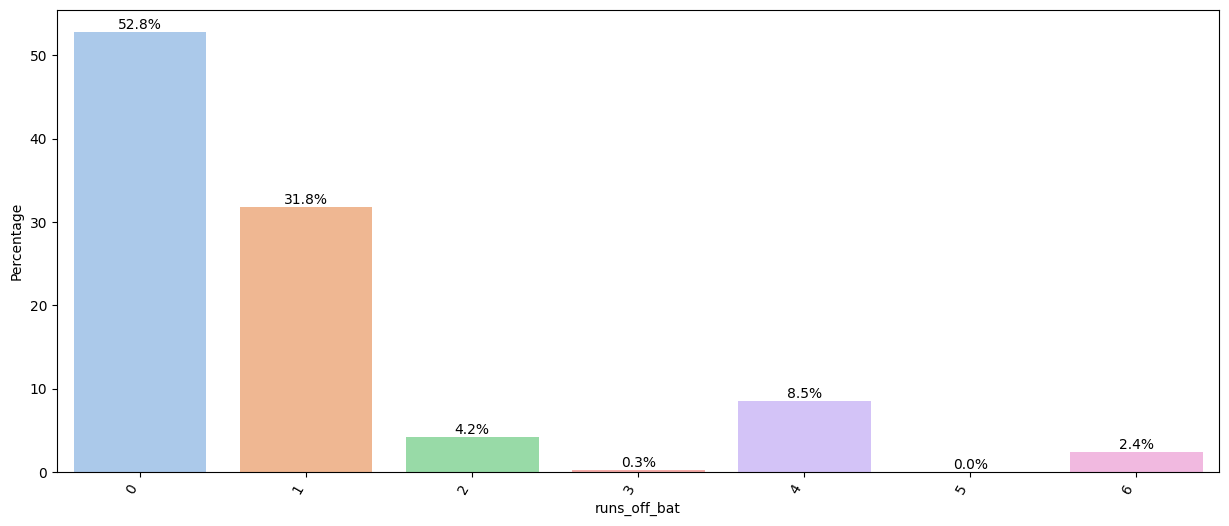

In [ ]:
plot_categorical_with_percentage(data, 'runs_off_bat')

### **Observation on extras**

In [ ]:
data['extras'].value_counts()

0    16763
1      557
5       21
2       19
4       16
3        4
Name: extras, dtype: int64

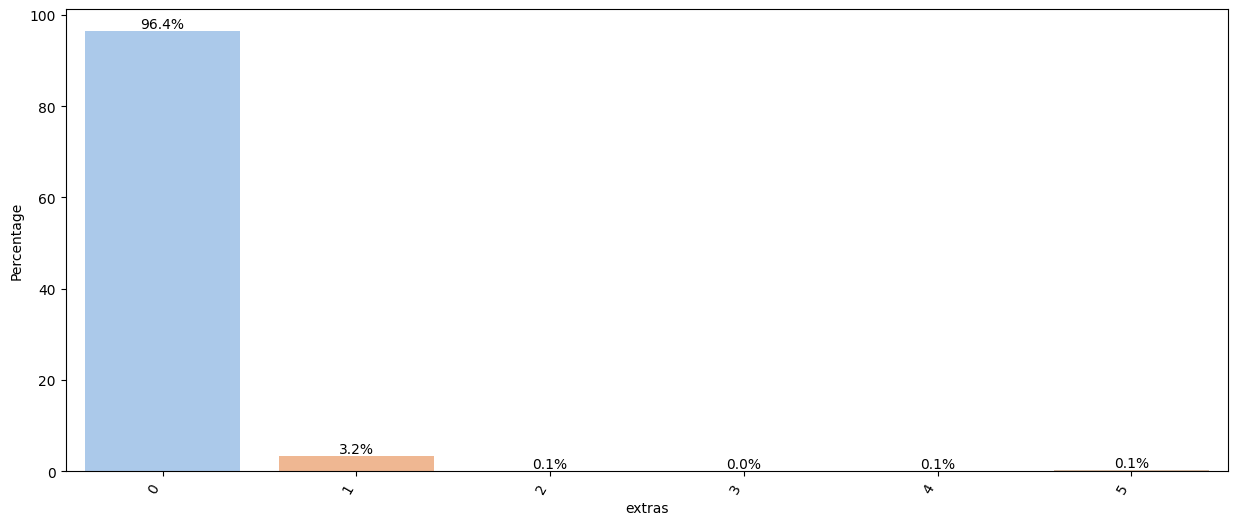

In [ ]:
plot_categorical_with_percentage(data, 'extras')

### **Observation on ball**

In [ ]:
data["ball"] = data["ball"].astype(str)
data[["over", "ball_num"]] = data["ball"].str.split(".", expand=True).astype(int)
data["ball"] = data["ball"].astype(float)

### **Observation on over**

In [ ]:
data["over"].head()

0    0
1    0
2    0
3    0
4    0
Name: over, dtype: int64

In [ ]:
data["over"] = data["over"] + 1

In [ ]:
data["ball_left"] = 306 - (data["over"]*6 + data["ball_num"])

In [ ]:
data["total_runs"] = data["runs_off_bat"] + data["extras"]

In [ ]:
data["cumulative_runs"] = data.groupby(["match_id", "innings"])["total_runs"].cumsum()

In [ ]:
data["run_rate"] = data.groupby(["match_id","innings"]).apply(lambda x: (x["cumulative_runs"]*6)/(300-x["ball_left"])).reset_index(level=[0,1], drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17380 entries, 0 to 17379
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17380 non-null  int64  
 1   start_date        17380 non-null  object 
 2   venue             17380 non-null  int64  
 3   innings           17380 non-null  int64  
 4   ball              17380 non-null  float64
 5   batting_team      17380 non-null  int64  
 6   bowling_team      17380 non-null  int64  
 7   striker           17380 non-null  int64  
 8   non_striker       17380 non-null  int64  
 9   bowler            17380 non-null  int64  
 10  runs_off_bat      17380 non-null  int64  
 11  extras            17380 non-null  int64  
 12  wides             17380 non-null  float64
 13  noballs           17380 non-null  float64
 14  byes              17380 non-null  float64
 15  legbyes           17380 non-null  float64
 16  penalty           17380 non-null  float6

**Convert the datatypes of whole dataframe.**

In [ ]:
data = data.convert_dtypes()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17380 entries, 0 to 17379
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17380 non-null  Int64  
 1   start_date        17380 non-null  object 
 2   venue             17380 non-null  Int64  
 3   innings           17380 non-null  Int64  
 4   ball              17380 non-null  Float64
 5   batting_team      17380 non-null  Int64  
 6   bowling_team      17380 non-null  Int64  
 7   striker           17380 non-null  Int64  
 8   non_striker       17380 non-null  Int64  
 9   bowler            17380 non-null  Int64  
 10  runs_off_bat      17380 non-null  Int64  
 11  extras            17380 non-null  Int64  
 12  wides             17380 non-null  Int64  
 13  noballs           17380 non-null  Int64  
 14  byes              17380 non-null  Int64  
 15  legbyes           17380 non-null  Int64  
 16  penalty           17380 non-null  Int64 

# **Matches Data**

In [ ]:
matches = pd.read_csv('/content/drive/MyDrive/Data_Mining_Datasets/matches.csv')

In [ ]:
matches.shape

(32, 18)

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           32 non-null     object 
 1   team1            32 non-null     object 
 2   team2            32 non-null     object 
 3   date             32 non-null     object 
 4   match_number     32 non-null     int64  
 5   venue            32 non-null     object 
 6   city             32 non-null     object 
 7   toss_winner      32 non-null     object 
 8   toss_decision    32 non-null     object 
 9   player_of_match  32 non-null     object 
 10  umpire1          32 non-null     object 
 11  umpire2          32 non-null     object 
 12  reserve_umpire   31 non-null     object 
 13  match_referee    32 non-null     object 
 14  winner           32 non-null     object 
 15  winner_runs      16 non-null     float64
 16  winner_wickets   16 non-null     float64
 17  match_type       3

In [ ]:
matches

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group
5,2023/24,New Zealand,Netherlands,2023/10/09,6,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,MJ Santner,PR Reiffel,RJ Tucker,Nitin Menon,AJ Pycroft,New Zealand,99.0,NaN,Group
6,2023/24,England,Bangladesh,2023/10/10,7,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,DJ Malan,Ahsan Raza,P Wilson,HDPK Dharmasena,J Srinath,England,137.0,NaN,Group
7,2023/24,Sri Lanka,Pakistan,2023/10/10,8,Rajiv Gandhi International Stadium,Hyderabad,Sri Lanka,bat,Mohammad Rizwan,AG Wharf,CB Gaffaney,RJ Tucker,AJ Pycroft,Pakistan,NaN,6.0,Group
8,2023/24,Afghanistan,India,2023/10/11,9,Arun Jaitley Stadium,Delhi,Afghanistan,bat,RG Sharma,MA Gough,PR Reiffel,Sharfuddoula,JJ Crowe,India,NaN,8.0,Group
9,2023/24,South Africa,Australia,2023/10/12,10,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Australia,field,Q de Kock,JS Wilson,RK Illingworth,CM Brown,J Srinath,South Africa,134.0,NaN,Group


In [ ]:
matches.rename(columns={"match_number":"match_id"}, inplace=True)

In [ ]:
matches = matches.drop(columns=['season'])

In [ ]:
matches['winner'].value_counts()

South Africa    6
India           6
New Zealand     4
Australia       4
Pakistan        3
Afghanistan     3
Netherlands     2
Sri Lanka       2
Bangladesh      1
England         1
Name: winner, dtype: int64

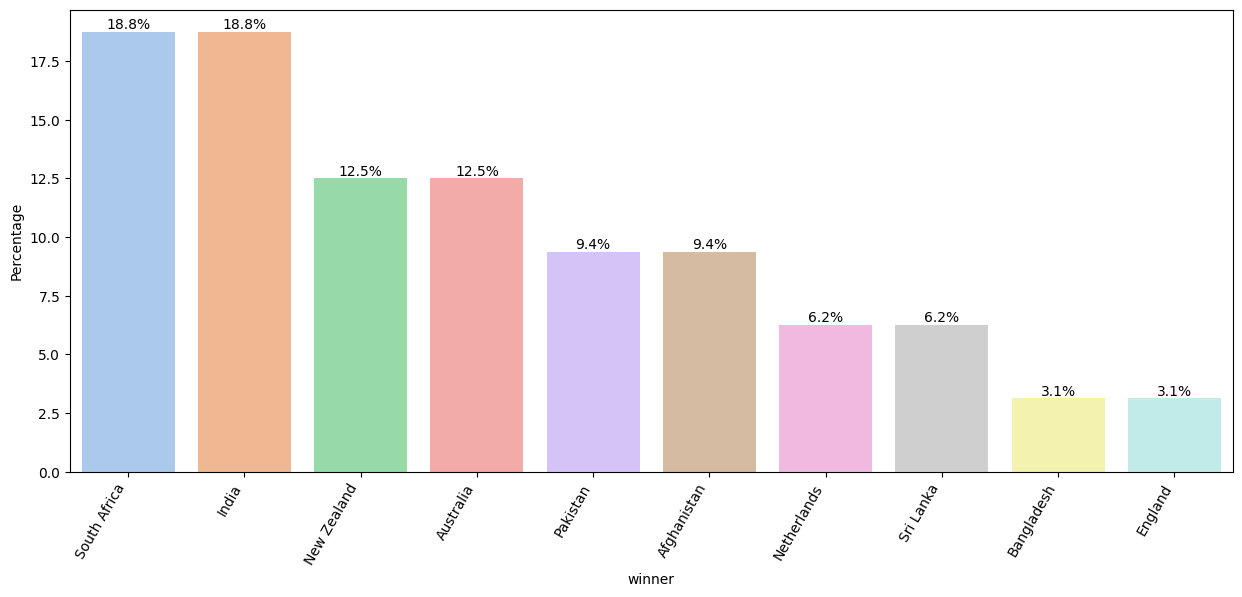

In [ ]:
plot_categorical_with_percentage(matches, 'winner')

In [ ]:
data = data.merge(matches[["match_id","winner"]], on="match_id")

In [ ]:
data['result'] = data.apply(lambda x: 1 if x['batting_team'] == x['winner'] else 0, axis=1)

In [ ]:
data.columns

Index(['match_id', 'start_date', 'venue', 'innings', 'ball', 'batting_team',
       'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat',
       'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
       'wicket_type', 'player_dismissed', 'wicket', 'over', 'ball_num',
       'ball_left', 'total_runs', 'cumulative_runs', 'run_rate', 'winner',
       'result'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17380 entries, 0 to 17379
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17380 non-null  Int64  
 1   start_date        17380 non-null  object 
 2   venue             17380 non-null  Int64  
 3   innings           17380 non-null  Int64  
 4   ball              17380 non-null  Float64
 5   batting_team      17380 non-null  Int64  
 6   bowling_team      17380 non-null  Int64  
 7   striker           17380 non-null  Int64  
 8   non_striker       17380 non-null  Int64  
 9   bowler            17380 non-null  Int64  
 10  runs_off_bat      17380 non-null  Int64  
 11  extras            17380 non-null  Int64  
 12  wides             17380 non-null  Int64  
 13  noballs           17380 non-null  Int64  
 14  byes              17380 non-null  Int64  
 15  legbyes           17380 non-null  Int64  
 16  penalty           17380 non-null  Int64 

In [ ]:
data['start_date'] = pd.to_datetime(data['start_date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17380 entries, 0 to 17379
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   match_id          17380 non-null  Int64         
 1   start_date        17380 non-null  datetime64[ns]
 2   venue             17380 non-null  Int64         
 3   innings           17380 non-null  Int64         
 4   ball              17380 non-null  Float64       
 5   batting_team      17380 non-null  Int64         
 6   bowling_team      17380 non-null  Int64         
 7   striker           17380 non-null  Int64         
 8   non_striker       17380 non-null  Int64         
 9   bowler            17380 non-null  Int64         
 10  runs_off_bat      17380 non-null  Int64         
 11  extras            17380 non-null  Int64         
 12  wides             17380 non-null  Int64         
 13  noballs           17380 non-null  Int64         
 14  byes              1738

In [ ]:
data = data.drop(columns=['start_date'])

In [ ]:
data['winner'] = label_encoder.fit_transform(data['winner'])

In [ ]:
data['winner'] = data['winner'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17380 entries, 0 to 17379
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17380 non-null  Int64  
 1   venue             17380 non-null  Int64  
 2   innings           17380 non-null  Int64  
 3   ball              17380 non-null  Float64
 4   batting_team      17380 non-null  Int64  
 5   bowling_team      17380 non-null  Int64  
 6   striker           17380 non-null  Int64  
 7   non_striker       17380 non-null  Int64  
 8   bowler            17380 non-null  Int64  
 9   runs_off_bat      17380 non-null  Int64  
 10  extras            17380 non-null  Int64  
 11  wides             17380 non-null  Int64  
 12  noballs           17380 non-null  Int64  
 13  byes              17380 non-null  Int64  
 14  legbyes           17380 non-null  Int64  
 15  penalty           17380 non-null  Int64  
 16  wicket_type       17380 non-null  string

# **Predicting the 2 finalist teams**

In [ ]:
train_data = data

features = train_data[['venue', 'innings', 'total_runs', 'run_rate', 'batting_team', 'bowling_team']]

train_data['result'] = train_data.apply(lambda x: 1 if x['batting_team'] == x['winner'] else 0, axis=1)

target = train_data['result']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

model.save_weights('model_weights.h5')


Epoch 1/10
435/435 [==============================] - 1s 2ms/step - loss: 0.1945 - accuracy: 0.9377 - val_loss: 0.1223 - val_accuracy: 0.9439
Epoch 2/10
435/435 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9662 - val_loss: 0.0404 - val_accuracy: 0.9770
Epoch 3/10
435/435 [==============================] - 1s 2ms/step - loss: 0.0235 - accuracy: 0.9943 - val_loss: 0.0199 - val_accuracy: 0.9991
Epoch 4/10
435/435 [==============================] - 1s 2ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 5/10
435/435 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/10
435/435 [==============================] - 1s 2ms/step - loss: 9.0173e-04 - accuracy: 1.0000 - val_loss: 9.1025e-04 - val_accuracy: 1.0000
Epoch 7/10
435/435 [==============================] - 1s 2ms/step - loss: 5.0369e-04 - accuracy: 1.0000 - val_loss: 7.0077e-04 - val_accurac

In [ ]:
new_tournament_data = data

new_features = new_tournament_data[['venue', 'innings', 'total_runs', 'run_rate', 'batting_team', 'bowling_team']]

scaler = StandardScaler()
new_features_scaled = scaler.fit_transform(new_features)

model = Sequential()
model.add(Dense(32, input_dim=new_features_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.load_weights('model_weights.h5')

predictions_proba = model.predict(new_features_scaled)
predictions = (predictions_proba > 0.5).astype(int)

finalist_teams = new_tournament_data.loc[predictions == 1, ['batting_team', 'bowling_team']].drop_duplicates()

print("Predicted Finalist Teams:")
print(finalist_teams)


544/544 [==============================] - 1s 1ms/step
Predicted Finalist Teams:
       batting_team  bowling_team
3563              3            10
3856              7             2
7897              6             4
9881              1            10
10329             4             9
